In [1]:
# %load ../standard_import.txt
# https://link.springer.com/content/pdf/bbm%3A978-1-4842-3913-1%2F1.pdf
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors

import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
plt.style.use('seaborn-dark')

#### Import datasets

In [2]:
# In R, I exported the dataset from package 'ISLR' to an Excel file
df = pd.read_excel('Data/Default.xlsx')

# Note: factorize() returns two objects: a label array and an array with the unique values.
# We are only interested in the first object. 
df['default2'] = df.default.factorize()[0]
df['student2'] = df.student.factorize()[0]
df.drop(columns=['Unnamed: 0'], inplace = True)
df.head(3)

,default,student,balance,income,default2,student2
0,No,No,729.526495,44361.625074,0,0
1,No,Yes,817.180407,12106.134700,0,1
2,No,No,1073.549164,31767.138947,0,0


In [3]:
admissions = pd.read_csv('~/Desktop/data_science/ga_bootcamp/Classes/4.01-lesson-logistic-regression/data/admissions.csv')
admissions.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


<AxesSubplot:xlabel='balance', ylabel='income'>

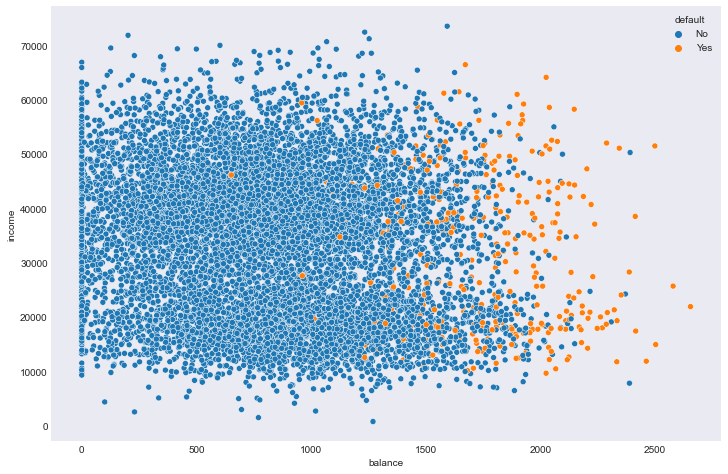

In [4]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='balance',y='income',data = df, hue='default')

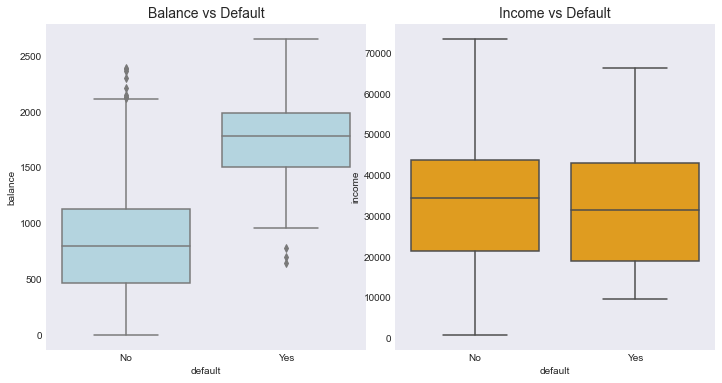

In [5]:
import seaborn as sns
fig, ax = plt.subplots(1,2, figsize = (12,6), sharey=False)
plt.subplots_adjust(wspace = 0.09)

sns.boxplot(x='default', y = 'balance', data = df, ax= ax[0], color='lightblue')
ax[0].set_title('Balance vs Default', fontsize = 14)
ax[0].set_label('Default')

sns.boxplot(x='default', y = 'income', data = df, ax = ax[1], color = 'orange')
ax[1].set_title('Income vs Default', fontsize = 14)
ax[1].set_label('Default')

## Classification
---
Process of predicting a _qualitative_ response

#### 4.3.1 Logistic Regression

Consider the default dataset, where the response default falls into one of two categories _yes_ or _no_. Rather than modelling this reponse Y directly, regression models the probability that Y belongs to a particular category. For example,
probability of default given _balance_ can be written as: `Pr(default = Yes|balance)`, which abbreviated as `p(balance)` will range between 0 and 1. So one might predict default = Yes for any individual with p(balance) > 0.5 but if company has lower threshold, they could even say that individual is at risk of default even if p(balance) > 0.1.

If we use this approach to predict default = Yes using _balance_ then we see that we obtain the model in the left hand panel below: for balances close to zero, we predict a negative probability of default.

In logistic regression, we use the logistic function. To fit a model, we use a method called _maximum likelihood_. The right hand panel illustrates the fit of the logistic regression. Notice that for low balances, we now predict the probability of default as close to, but never below 0. Likewise, for high balances we predict a default probability close to but never above 1. The logistic function will always produce an _s_shaped_ curved of the form, as so regardless the value of X, we will obtain a sensible prediction.

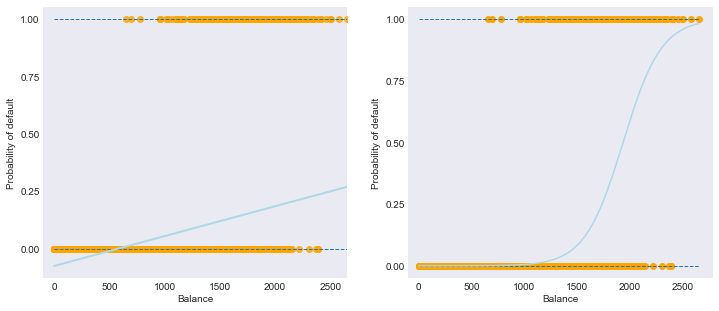

In [6]:
X_train = df.balance.values.reshape(-1,1) 
y = df.default2

# Create array of test data. Calculate the classification probability
# and predicted classification.
X_test = np.arange(df.balance.min(), df.balance.max()).reshape(-1,1)

clf = LogisticRegression(solver='newton-cg')
clf.fit(X_train,y)
prob = clf.predict_proba(X_test)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
# Left plot
sns.regplot(df.balance, df.default2, order=1, ci=None,
            scatter_kws={'color':'orange'},
            line_kws={'color':'lightblue', 'lw':2}, ax=ax1)
# Right plot
ax2.scatter(X_train, y, color='orange')
ax2.plot(X_test, prob[:,1], color='lightblue')

for ax in fig.axes:
    ax.hlines(1, xmin=ax.xaxis.get_data_interval()[0],
              xmax=ax.xaxis.get_data_interval()[1], linestyles='dashed', lw=1)
    ax.hlines(0, xmin=ax.xaxis.get_data_interval()[0],
              xmax=ax.xaxis.get_data_interval()[1], linestyles='dashed', lw=1)
    ax.set_ylabel('Probability of default')
    ax.set_xlabel('Balance')
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1.])
    ax.set_xlim(xmin=-100)

#### 4.3.2 Estimating the Regression Coefficients
---
The estimates of $\hat\beta_0$ and $\hat\beta_1$ are chosen to _maximize_ the likelihood function. We see that the $\hat \beta_1$ = 0.0055; this indicates that an increase in balance is associated with an increase in the probability of default. To be precise, a one-unit increase in balance is associated with an increase in the log odds of default by 0.0055 units. One should also check the p-value using z-statistic (equivalent to t-statistic in the linear regression) to understand if there is actually an association between balance and default. We are looking for a low p-value (maybe use stats models).

In [7]:
display(df.head(2))
print()
print(df.balance.values.shape)
print()
print(df.balance.values.reshape(-1,1).shape)

,default,student,balance,income,default2,student2
0,No,No,729.526495,44361.625074,0,0
1,No,Yes,817.180407,12106.134700,0,1



(10000,)

(10000, 1)


We see that the $\hat \beta_1$ = 0.0055; this indicates that an increase in balance is associated with an increase in the probability of default. To be precise, a one-unit increase in balance is associated with an increase in the log odds of default by 0.0055 units. One should also check the p-value using z-statistic (equivalent to t-statistic in the linear regression) to understand if there is actually an association between balance and default. We are looking for a low p-value (maybe use stats models).

In [8]:
X_train = df.balance.values.reshape(-1,1)
y = df.default2
clf = LogisticRegression(solver='newton-cg')
clf.fit(X_train,y)
print(clf)
print('classes: ',clf.classes_)
print('coefficients: ',clf.coef_)
print('intercept :', clf.intercept_)


LogisticRegression(solver='newton-cg')
classes:  [0 1]
coefficients:  [[0.00549892]]
intercept : [-10.65132881]


#### 4.3.3 Making Predictions

###### Predicting a Binary Class

---

In our case we have two classes: `1=default` and `0=no default`.

The logistic regression is still solving for $\hat{Y}$. However, in our binary classification case, $\hat{Y}$ will be the probability of `y` being one of the classes.

### $$\hat{Y} = P(Y = 1)$$

We'll still try to fit a "line" of best fit to this... except it won't be perfectly linear. We need to *guarantee* that the right-hand side of the regression equation will evaluate to a probability. (That is, some number between 0 and 1!)

###### The Logit Link Function (advanced)

---

We will use something called a **link function** to effectively "bend" our line of best fit so that it is a curve of best fit that matches the range or set of values in which we're interested.

For logistic regression, that specific link function that transforms ("bends") our line is known as the **logit** link.

### $$\text{logit}\left(P(Y = 1)\right) = \beta_0 + \beta_1X_1 + \beta_2X_2 + \cdots + \beta_pX_p$$

### $$\log\left(\frac{P(Y = 1)}{1 - P(Y = 1)}\right) = \beta_0 + \beta_1X_1 + \beta_2X_2 + \cdots + \beta_pX_p$$

Equivalently, we assume that each independent variable $X_i$ is linearly related to the **log of the odds of success**.

Remember, the purpose of the link function is to bend our line of best fit.
- This is convenient because we can have any values of $X$ inputs that we want, and we'll only ever predict between 0 and 1!
- However, interpreting a one-unit change gets a little harder. (More on this later.)

## Using SKLEARN for Logistic Regression

###### Ignore this part
The signal for detecting admission in the college data is fairly weak — too weak for the purposes of our demonstration. (There are lots of factors associated with getting admitted to grad school other than GPA, test score, and prestige.)

**Obviously you would never do this to your real data**... but in order to make the relationship between our predictors and whether or not someone is admitted a lot clearer, we are making 10 copies of the data set and adding an artificial signal for detecting `admit` to the `gpa` column.

In [9]:
#Grab all rows where prestige = 1.
admit = admissions[admissions['prestige'] == 1]

# Concatenate ten copies of admit.
admit = pd.concat([admit] * 10, axis=0)

# Set a random seed.
np.random.seed(42)

# Add random noise to inflate GPA for people who were admitted.
# Subtract random noise to deflate GPA for people who were not admitted.
# Again: DO NOT DO THIS IN GENERAL.
admit.loc[admit['admit'] == 1, 'gpa'] += np.random.random(size=admit[admit.admit == 1].shape[0])
admit.loc[admit['admit'] == 0, 'gpa'] -= np.random.random(size=admit[admit.admit == 0].shape[0])

## What If We Predicted `admit` With `gpa` Using Logistic Regression?

In [10]:
admit.head(2)

,admit,gre,gpa,prestige
2,1,800.0,4.374540,1.0
6,1,560.0,3.930714,1.0


### 1. Split Data into Train and Test Split

<a name="train-test-split"></a>
#### Train/Test Split and Model Validation

---

So far we've focused on fitting the best model to our data. But is this the best model for our sample data or the best model overall? How do we know?

In practice we need to validate our model's ability to generalize to new data. One popular method for performing model validation is by splitting our data into subsets: data on which we *train* our model and data on which we *test* our model.

The most basic type of "hold-out" validation is called **train/test split**. We split our data into two pieces:

> **"A Training Set":** The subset of the data on which we fit our model.

> **"A Testing Set":** The subset of the data on which we evaluate the quality of our predictions.


**Train/Test Split Benefits:**

- Testing data can represent "future" data; for prediction-oriented models, it's critical to ensure that a model that is performing well on current data will likely perform well on future data.
- It can help diagnose and avoid overfitting via model tuning.
- It can improve the quality of our predictions.

---
<a id='sklearn-tts'></a>

#### Scikit-Learn's `train_test_split` Function
---

Performing train/test splits using scikit-learn is easy — load the `train_test_split` function:

```python
from sklearn.model_selection import train_test_split
```

**Arguments**:
- *Arrays*: Any number of arrays/matrices to split up into training and testing sets (they should be the same length).
- `test_size`: An integer representing the exact size of the testing subset or a float for a percentage.
- `train_size`: Alternatively, you can specify the training size.
- `stratify`: Supply a vector to stratify the splitting (by more important classification tasks).
- `random_state`: a numerical seed for randomly splitting your data with reproducibility

**Perform a split of our `X` and `y`.**

In [11]:
# Define X and Y 
# Because X is usually a matrix, we'll get a reshape request if we don't use double brackets
# Chances of you being admitted based on your GPA?
X = admit[['gpa']]
Y = admit['admit']

# Split the dataset into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state=42)

# Ensure training dataset has only 67% of original X data
print(X_train.shape[0] / X.shape[0])

# Ensure testing dataset has only 33% of original X data
print(X_test.shape[0] / X.shape[0])

0.6688524590163935
0.33114754098360655


### 2. Initialise model and fit model onto the training data

---
###### Interpreting a one-unit change in $X_i$.

$$\log\bigg(\frac{P(Y=1)}{1-P(Y=1)}\bigg) = \beta_0 + \beta_1X_1 + \beta_2X_2 + \cdots + \beta_pX_p$$

Given this model, a one-unit change in $X_i$ implies a $\beta_i$ unit change in the log odds of success.

**This is annoying**.

We often convert log-odds back to "regular odds" when interpreting our coefficient... our mind understands odds better than the log of odds.

**(BONUS)** So, let's get rid of the log on the left-hand side. Mathematically, we do this by "exponentiating" each side.
$$
\begin{eqnarray*}
\log\bigg(\frac{P(Y=1)}{1-P(Y=1)}\bigg) &=& \beta_0 + \beta_1X_1 + \beta_2X_2 + \cdots + \beta_pX_p \\
\Rightarrow e^{\Bigg(\log\bigg(\frac{P(Y=1)}{1-P(Y=1)}\bigg)\Bigg)} &=& e^{\Bigg(\beta_0 + \beta_1X_1 + \beta_2X_2 + \cdots + \beta_pX_p\Bigg)} \\
\Rightarrow \frac{P(Y=1)}{1-P(Y=1)} &=& e^{\Bigg(\beta_0 + \beta_1X_1 + \beta_2X_2 + \cdots + \beta_pX_p\Bigg)} \\
\end{eqnarray*}
$$

**Interpretation**: A one-unit change in $X_i$ means that success is $e^{\beta_i}$ times as likely.


I want to interpret the coefficient $\hat{\beta}_1$ for my logistic regression model. How would I interpret this coefficient?
    
- Our model is that $\log\bigg(\frac{P(admit=1)}{1-P(admit=1)}\bigg) = \beta_0 + \beta_1\text{GPA}$.
- As GPA increases by 1, the log-odds of someone being admitted increases by 3.95.
- As GPA increases by 1, someone is $e^{3.95}$ times as likely to be admitted.
- As GPA increases by 1, someone is about 52 times as likely to be admitted to grad school.
</details>

> Hint: Use the [np.exp](https://docs.scipy.org/doc/numpy/reference/generated/numpy.exp.html) function.

We see that the $\hat \beta_1$ = 3.95; this indicates that an increase in gpa is associated with an increase in the probability of being admitted. To be precise, a one-unit increase in gpa is associated with an increase in the log odds of being admitted by 3.95 units. One should also check the p-value using z-statistic (equivalent to t-statistic in the linear regression) to understand if there is actually an association between gpa and admit. We are looking for a low p-value (maybe use stats models).

In [12]:
#2 Initialise the model
logreg = LogisticRegression()

# 3. Fit the model on the training data (training model)
logreg.fit(X_train, Y_train)
print("Intercept: ", logreg.intercept_)
print("Coefficients:")
list(zip(X, logreg.coef_))

Intercept:  [-13.45351825]
Coefficients:


[('gpa', array([3.95893424]))]

In [13]:
print("Exponentiated coefficient: ", np.exp(logreg.coef_))

Exponentiated coefficient:  [[52.40144864]]


### 3. Make predictions from own input or test set

#### - Predict on test data

In [14]:
# Predict values on the testing data which I had split earlier with train-test-split
pred_Y = logreg.predict(X_test)
print("Prediction for test set: {}".format(pred_Y)) # This will return a list (np array of predictions)

Prediction for test set: [1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 1
 1 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 0 1 1 0 0 1 1 1 0 1
 0 0 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1
 1 0 0 1 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 1 1 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1
 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1
 1 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1]


In [15]:
# Predict values on the testing data which I had split earlier with train-test-split
pred_Y_proba = logreg.predict_proba(X_test) # probability of output being 0, probability of output being 1
print("Prediction for test set: {}".format(pred_Y_proba)) # This will return a list (np array of predictions)

Prediction for test set: [[0.0082074  0.9917926 ]
 [0.34577035 0.65422965]
 [0.09502813 0.90497187]
 [0.08767435 0.91232565]
 [0.0405777  0.9594223 ]
 [0.09583519 0.90416481]
 [0.02257543 0.97742457]
 [0.98668709 0.01331291]
 [0.02477751 0.97522249]
 [0.58010229 0.41989771]
 [0.13348206 0.86651794]
 [0.02147017 0.97852983]
 [0.86062646 0.13937354]
 [0.00547709 0.99452291]
 [0.96837761 0.03162239]
 [0.01201441 0.98798559]
 [0.05038113 0.94961887]
 [0.33988366 0.66011634]
 [0.74010338 0.25989662]
 [0.89235473 0.10764527]
 [0.89873678 0.10126322]
 [0.79308529 0.20691471]
 [0.91277458 0.08722542]
 [0.08963771 0.91036229]
 [0.98190927 0.01809073]
 [0.20444816 0.79555184]
 [0.94251776 0.05748224]
 [0.55781136 0.44218864]
 [0.08654234 0.91345766]
 [0.97193832 0.02806168]
 [0.99877433 0.00122567]
 [0.44851562 0.55148438]
 [0.98625858 0.01374142]
 [0.83402618 0.16597382]
 [0.82313052 0.17686948]
 [0.04588282 0.95411718]
 [0.10893612 0.89106388]
 [0.15339527 0.84660473]
 [0.27223343 0.72776657]


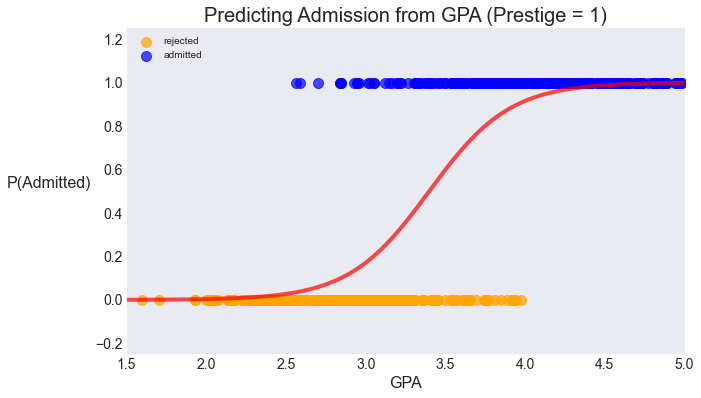

In [16]:
# Visualizing logistic regression probabilities.

# Create figure.
plt.figure(figsize=(10,6))

# Plot the regression line where gpa predicts admit.
x_vals = np.linspace(1, 5, 3000)

# Nicholas Jin - BOS
# Plot line of best fit
plt.plot(x_vals,
         logreg.predict_proba(x_vals.reshape(-1,1))[:,1],
         color='red', alpha=0.7, lw=4)

# Create scatterplot with orange dots for those rejected.
plt.scatter(admit['gpa'][admit['admit'] == 0],
            admit['admit'][admit['admit'] == 0],
            c='orange',
            s=100,
            alpha=0.7,
            label='rejected')

# Create scatterplot with blue dots for those admitted.
plt.scatter(admit['gpa'][admit['admit'] == 1],
            admit['admit'][admit['admit'] == 1],
            c='blue',
            s=100,
            alpha=0.7,
            label='admitted')

# Set labels of axes and title.
plt.ylabel('P(Admitted)', fontsize=16, rotation = 'horizontal', ha = 'right')
plt.yticks(fontsize = 14)
plt.xlabel('GPA', fontsize=16)
plt.xticks(fontsize = 14)
plt.title('Predicting Admission from GPA (Prestige = 1)', fontsize=20)
plt.xlim(1.5, 5)
plt.ylim(-0.25, 1.25)
plt.legend(loc='upper left');

In [17]:
# Check out difference between what my model predicted on testing data and also what really happened!
actual_and_predicted_diff = pd.DataFrame({'Actual Admission':Y_test, 'Predicted Admission': pred_Y})
actual_and_predicted_diff.head(5)

,Actual Admission,Predicted Admission
118,1,1
222,1,1
364,1,1
335,1,1
118,1,1


In [18]:
admit[['gpa']].max()
admit[['gpa']].max()

gpa    4.986887
dtype: float64

In [19]:
admit[['gpa']].min()

gpa    1.599589
dtype: float64

#### - Predict from Own input 

**Will I be admitted be if I got 4.5 for my GPA?**

Ans: `logreg.predict([[4.5]])`

In [20]:
# 1 means Yes, 0 means No
pd.DataFrame({'Will I be admitted based on my GPA score of 4.5': logreg.predict([[4.5]])})

,Will I be admitted based on my GPA score of 4.5
0,1


### 4. Evaluate the model 

#### Model Evaluation
---

We need two scores to determine if our model is performing well, or experiencing high bias/variance. Use the `.score()` method on **both** the training set (`X_train`, `y_train`) and the test set (`X_test`, `y_test`).

```python
model.score(X_train, y_train)
```

<a id='cross-val-k-fold'></a>

#### K-Fold Cross-Validation

---

K-fold cross-validation takes the idea of a single train/test split and expands it to *multiple tests* across different train/test splits of your data.

For example, if you determine your training set will contain 80 percent of the data and your testing set will contain the other 20 percent, you could have five different 80/20 splits in which the test set in each is a different set of observations. We have:
- Five (K=5) training sets.
- Five (K=5) corresponding testing sets.

**K-fold cross-validation builds K models — one for each train/test pair — and evaluates those models on each respective test set.**

##### K-Fold Cross-Validation Visually

<img src="https://snag.gy/o1lLcw.jpg?convert_to_webp=true" width="500">

---

Cross-validation helps us understand how a model parameterization may perform in a variety of cases. The k-fold cross-validation procedure can be described in pseudocode:

```
set k
create k groups of rows in data

for group i in k row groups:
    test data is data[group i]
    train data is data[all groups not i]
    
    fit model on train data
    
    score model on test data
    
evaluate mean of k model scores
evaluate variance of k model scores
```

Odd case No. 1:
> **When K=2**: This is equivalent to performing ***two*** mirror image 50-50 train/test splits.

Odd case No. 2:
> **When K=number of rows**: This is known as "leave-one-out cross-validation," or LOOCV. A model is built on all but one row and tested on the single excluded observation.

In [21]:
print("Logistic Regression Accuracy Score: ",logreg.score(X_test, Y_test))

Logistic Regression Accuracy Score:  0.8861386138613861


# K Nearest Neighbors classification walkthrough

From here on out we are going to look at how the kNN algorithm classifies an unknown point using the Iris dataset.

---

<a id='nonparametric'></a>

### Note on parametric vs. nonparametric methods

Thus far, all of our tests and methods have been **parametric**. That is, we have assumed a certain distribution for our data. In linear regression our parameters are the coefficients in our model, and our estimate of the target is calculated from these parameters.

There are alternatives in the case where we cannot assume a particular distribution for our data or choose not to. These methods are **nonparametric** When we make no assumptions about the distribution for our data, we call our data nonparametric. For nearly every parametric test, there is a nonparametric analog available. The KNN model is an example of a nonparametric model. You can see that there are no coefficients for the different predictors and our estimate is not represented by a formula of our predictor variables.

---

## kNN

![](https://snag.gy/hatSE6.jpg)

The pseudocode algorithm for kNN is as follows:



```
for unclassified_point in sample:
    for known_point in known_class_points:
        calculate distances (euclidean or other) between known_point and unclassified_point
    for k in range of specified_neighbors_number:
        find k_nearest_points in known_class_points to unclassified_point
    assign class to unclassified_point using "votes" from k_nearest_points
```
> ### Common KNN Distance Functions
> These distance functions can be used with KNN.  Euclidean is the most common choice.
>
> ### Euclidean  
> $\sqrt{\sum\limits_{i=1}^k(x_i - y_i)^2}$
>
> ### Manhattan 
> $\sum\limits_{i=1}^k \left| x_i - y_i \right|$
>
> ### Minkowski
> $\left(\sum_{i=1}^n |x_i-y_i|^p\right)^{1/p}$

---

[NOTE: in the case of ties, `sklearn`'s `KNeighborsClassifier()` will just choose the first class using uniform weights! If this is unappealing to you you can change the weights keyword argument to 'distance'.]


<a id='euclidean'></a>
## Euclidean distance

---
KNN typically uses one of two distance metrics: euclidean or manhattan. Other distance metrics (e.g. Minkwoski) are possible, but rare.


Recal the famous Pythagorean Theorem
![Alt text](http://ncalculators.com/images/pythagoras-theorem.gif)

We can apply the theorem to calculate distance between points. This is called Euclidean distance. 

![Alt text](http://rosalind.info/media/Euclidean_distance.png)

### $$\text{Euclidean  distance}=\sqrt{(x_1-x_2)^2+(y_1-y_2)^2}$$

There are many different distance metrics, but Euclidean is the most common (and default in `sklearn`).


In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

## `load_iris()` properties
---

The `data` variable has several important properties you'll need to be familiar with:
1. `data.data`: This is your `X`. In our case, it's a 150x4 matrix of features.
2. `data.target`: This is your `y`. It's an array of 150 values (0, 1, 2). Each index corresponds do a different species of Iris flower.
3. `data.feature_names`: These are the names of each of your 4 features (corresponding to the 4 columns in `data.data`
4. `data.target_names`: These are the names of your 3 Iris species: Setosa, Versicolor and Virginica. **The order in `data.target_names` corresponds to the index in `data.target`.**

In [23]:
flowers = load_iris()

# Convert to dataframe
df = pd.DataFrame(flowers.data, columns=flowers.feature_names)
df['species'] = flowers.target
df.head()
print(df.species.value_counts()) # 3 categories in species

0    50
1    50
2    50
Name: species, dtype: int64


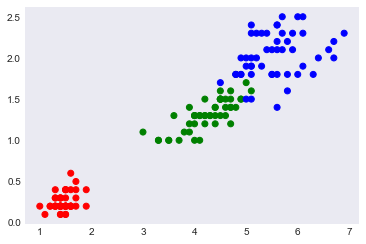

In [24]:
colors = ['red', 'green', 'blue']
color_series = df['species'].map(lambda s: colors[s]) # break colours up by species
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], color=color_series)

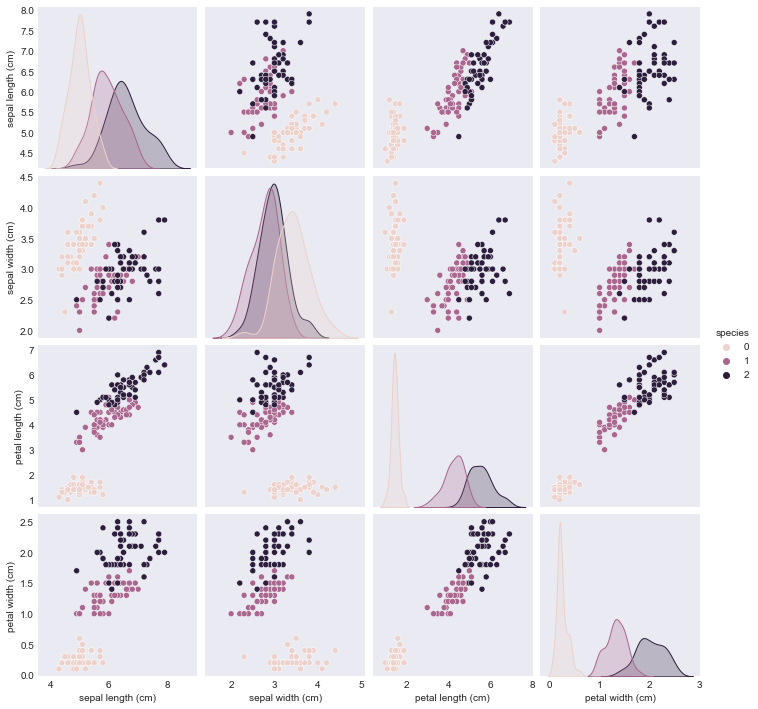

In [25]:
sns.pairplot(df, hue='species')

### 1. Split Data into Train and Test Split

In [26]:
print(flowers.feature_names)

X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
Y = df['species']

# Train test split 
#Stratified sampling is a sampling technique where the samples are selected in the same proportion 
#(by dividing the population into groups called 'strata' based on a characteristic) as they appear in the population.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state=42, stratify = Y)

# Ensure training dataset has only 67% of original X data
print(X_train.shape[0] / X.shape[0])

# Ensure testing dataset has only 33% of original X data
print(X_test.shape[0] / X.shape[0])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
0.6666666666666666
0.3333333333333333


## `StandardScaler`
---

Because KNN is calculating the distance between neighbors, it's highly sensitive to the magnitude of your features. For example, if we were using KNN on a housing dataset, a feature like square footage (measured in **thousands** of feet^2) can really affect the distance. 

Thus, in order for KNN to work properly, it's important to scale our data. In the cells below, create an instance of `StandardScaler` and use it to transform `X_train` and `X_test`.

In [27]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train) # fit transform on train
X_test_sc = ss.transform(X_test) # transform on test

## ### 2. Initialise model and fit model onto the training data
---

For the `KNeighborsClassifier`, there a few important parameters to keep in mind:

1. `n_neighbors`: this is the "K" in KNN. The best K will change from problem to problem, but the default is 5.
2. `weights`: The neighbors can all have an equal vote (`uniform`), or the closer points can have a higher weighted vote (`distance`).
3. `p`: The distance metric. The default is Euclidean distance (2). Changing it to 1 is setting the distance to Manhattan.

In the cell below, instantiate a `knn` model using the default parameters.

In [28]:
knn = KNeighborsClassifier()

In [29]:
# Use cross val to see what outcome can we expect to see from our KNN model
# Out of out 10 cross val scores, get the mean, score your training set
cross_val_score(knn, X_train_sc, Y_train, cv=10).mean() # Y train, it is 0, 1, 2

0.97

In [30]:
# If you change k to 2 neighbours
cross_val_score(KNeighborsClassifier(n_neighbors=2), X_train_sc, Y_train, cv=10).mean()


0.95

In [31]:
# Fit the model on the training data (training model)
knn.fit(X_train_sc, Y_train)

KNeighborsClassifier()

### 3. Make predictions from own input or test set

In [32]:
# Predict values on the testing data which I had split earlier with train-test-split
pred_Y = knn.predict(X_test_sc)
print("Prediction for test set: {}".format(pred_Y)) # This will return a list (np array of predictions)

Prediction for test set: [1 1 0 1 2 1 1 0 1 1 0 0 0 0 0 2 1 1 2 1 2 1 0 2 0 2 2 0 0 2 2 2 0 1 0 0 2
 1 1 1 1 1 0 0 1 1 2 1 1 2]


In [33]:
# Check out difference between what my model predicted on testing data and also what really happened!
actual_and_predicted_diff = pd.DataFrame({'Actual Species':Y_test, 'Predicted Species': pred_Y})
actual_and_predicted_diff.head(5)

,Actual Species,Predicted Species
133,2,1
56,1,1
7,0,0
67,1,1
107,2,2


### 4. Evaluate the model 

In [34]:
print("KNN Accuracy Score: ",knn.score(X_test_sc, Y_test))

KNN Accuracy Score:  0.92


In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, pred_Y)

-----------------------

### 1. Split Data into Train and Test Split

In [36]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

# Convert to dataframe
df = pd.DataFrame(data.data, columns=data.feature_names)
df['tumor'] = data.target
df.head()
print(df.tumor.value_counts()) # 1 refers to benign (not dangerous), 0 refers to malignant (dangerous) thus change it
df['tumor'] = df['tumor'].map({0:1,1:0})
print()
print(df.tumor.value_counts()) # Sanity Check

1    357
0    212
Name: tumor, dtype: int64

0    357
1    212
Name: tumor, dtype: int64


In [37]:
df.tumor.head()

0    1
1    1
2    1
3    1
4    1
Name: tumor, dtype: int64

In [38]:
print(data.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [39]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'tumor'],
      dtype='object')

In [40]:
print(data.feature_names)


X = df[['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension']]
Y = df['tumor']


# Train test split 
#Stratified sampling is a sampling technique where the samples are selected in the same proportion 
#(by dividing the population into groups called 'strata' based on a characteristic) as they appear in the population.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state=42, stratify = Y)

# Ensure training dataset has only 67% of original X data
print(X_train.shape[0] / X.shape[0])

# Ensure testing dataset has only 33% of original X data
print(X_test.shape[0] / X.shape[0])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
0.6695957820738138
0.3304042179261863


In [41]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train) # fit transform on train
X_test_sc = ss.transform(X_test) # transform on test

### 2. Initialise model and fit model onto the training data

In [42]:
knn = KNeighborsClassifier()

In [43]:
# Use cross val to see what outcome can we expect to see from our KNN model
# Out of out 10 cross val scores, get the mean, score your training set
cross_val_score(knn, X_train_sc, Y_train, cv=10).mean() # Y train, it is 0, 1

0.9632253711201081

In [44]:
# Fit the model on the training data (training model)
knn.fit(X_train_sc, Y_train)

KNeighborsClassifier()

### 3. Make predictions from own input or test set

In [45]:
# Predict values on the testing data which I had split earlier with train-test-split
pred_Y = knn.predict(X_test_sc)
print("Prediction for test set: {}".format(pred_Y)) # This will return a list (np array of predictions)

Prediction for test set: [0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 1
 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 0 1 0 0
 1 1 0 1 0 0 0 0 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0
 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0
 0 0 0]


### 4. Evaluate the model 

In [46]:
cm = confusion_matrix(Y_test, pred_Y)

In [47]:
cm_df = pd.DataFrame(cm, columns=['Pred benign = 0', 'pred malignant = 1'], index=['actual benign = 0', 'actual malignant = 1'])
cm_df

,Pred benign = 0,pred malignant = 1
actual benign = 0,118,0
actual malignant = 1,8,62


In [48]:
# Save TN/FP/FN/TP values.

tn, fp, fn, tp = confusion_matrix(Y_test, pred_Y).ravel()

In [49]:
print(f"Number of False Positive (Type I Error):  {fp}")
print(f"Number of False Negative (Type II Error): {fn}")

Number of False Positive (Type I Error):  0
Number of False Negative (Type II Error): 8


In [50]:
conf_mat = pd.DataFrame(columns=['Actual Malignant=1', 'Actual Benign=0'], 
                         index=['Predicted Malignant=1', 'Predicted Benign=0'],
                         data=[[f'{tp} (True Pos)', f'{fp} (False Pos)'], [f'{fn} (False Neg)', f'{tn} (True Neg)']]
                        )
conf_mat

,Actual Malignant=1,Actual Benign=0
Predicted Malignant=1,62 (True Pos),0 (False Pos)
Predicted Benign=0,8 (False Neg),118 (True Neg)


In [51]:
"""
Really look at what you are optimising for. Sensitivy/Recall or Precision or alternatively take the harmonic mean of both throught the F-1
score. Increasing precision reduces recall and vice versa. Precision-Recall tradeoff.
"""

sensitivity = tp/(tp+fn) # Sensitivity = Recall (True Positive Rate) Number of positive instances detected by classifier
specificity = tn/(tn+fp) # Accuracy of negative predictions
precision = tp/(tp+fp) # Accuracy of positive predictions
print(sensitivity)
print(specificity)
print(precision)

0.8857142857142857
1.0
1.0


In [57]:
from sklearn.metrics import precision_score, recall_score, f1_score
print(f"Precision Score: {precision_score(Y_test, pred_Y)}")
print(f"Sensitivity/Recall Score: {recall_score(Y_test, pred_Y)}")
print(f"F1-Score Score: {f1_score(Y_test, pred_Y)}")

Precision Score: 1.0
Sensitivity/Recall Score: 0.8857142857142857
F1-Score Score: 0.9393939393939393


You'll have precision, recall, f1-score and support for each class you're trying to find.

- The recall means "how many of this class you find over the whole number of element of this class"

- The precision will be "how many are correctly classified among that class"

- The f1-score is the harmonic mean between precision & recall

- The support is the number of occurence of the given class in your dataset (so you have 118 of class 0 and 70 of class 1, which is slightly imbalanced.

In [52]:
from sklearn.metrics import classification_report, roc_auc_score
print(confusion_matrix(Y_test, pred_Y))
print(classification_report(Y_test, pred_Y))

[[118   0]
 [  8  62]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       118
           1       1.00      0.89      0.94        70

    accuracy                           0.96       188
   macro avg       0.97      0.94      0.95       188
weighted avg       0.96      0.96      0.96       188



In [78]:
from sklearn.metrics import classification_report
target_names = ['Class 0: Benign', 'Class 1: Malignant']
print(classification_report(Y_test, pred_Y,target_names=target_names))

                    precision    recall  f1-score   support

   Class 0: Benign       0.94      1.00      0.97       118
Class 1: Malignant       1.00      0.89      0.94        70

          accuracy                           0.96       188
         macro avg       0.97      0.94      0.95       188
      weighted avg       0.96      0.96      0.96       188



Which error is worse?

- Type II, because the patient has a malignant tumor and our model is telling them otherwise

## Relationship between Sensitivity and Specificity

In [60]:
# Let's create a dataframe called pred_df that contains:
# 1. The list of true values of our test set.
# 2. The list of predicted probabilities based on our model.

pred_Y_proba = [i[1] for i in knn.predict_proba(X_test_sc)]

pred_df = pd.DataFrame({'true_values': Y_test,
                        'pred_probs':pred_Y_proba})

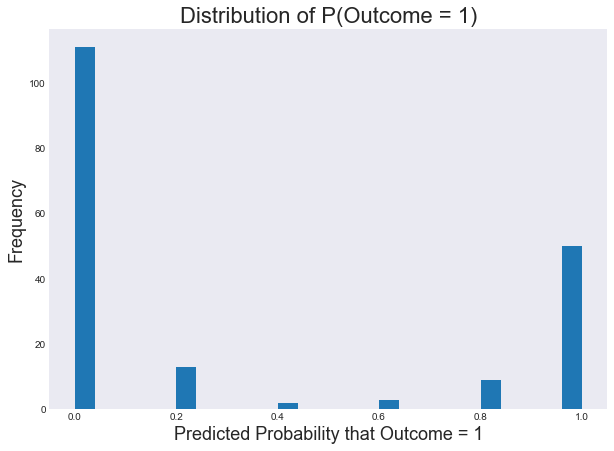

In [68]:
# Create figure.
plt.figure(figsize = (10,7))

# Create histogram of observations.
plt.hist(pred_df['pred_probs'], bins = 25)

# Label axes.
plt.title('Distribution of P(Outcome = 1)', fontsize = 22)
plt.ylabel('Frequency', fontsize = 18)
plt.xlabel('Predicted Probability that Outcome = 1', fontsize = 18);

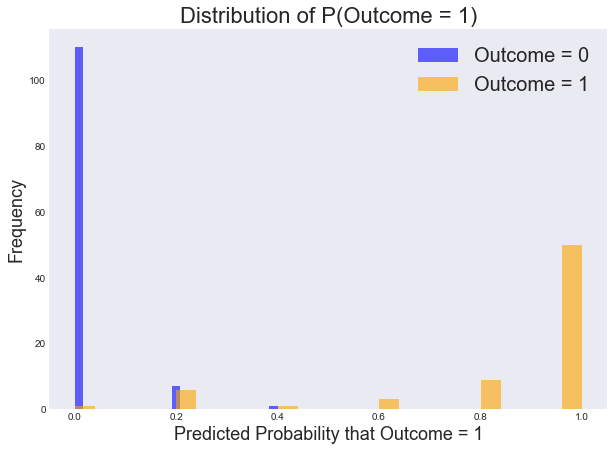

In [71]:
# Create figure.
plt.figure(figsize = (10,7))

# Create two histograms of observations.
plt.hist(pred_df[pred_df['true_values'] == 0]['pred_probs'],
         bins = 25,
         color = 'b',
         alpha = 0.6,
         label = 'Outcome = 0')
plt.hist(pred_df[pred_df['true_values'] == 1]['pred_probs'],
         bins = 25,
         color = 'orange',
         alpha = 0.6,
         label = 'Outcome = 1')

# Label axes.
plt.title('Distribution of P(Outcome = 1)', fontsize = 22)
plt.ylabel('Frequency', fontsize = 18)
plt.xlabel('Predicted Probability that Outcome = 1', fontsize = 18)

# Create legend.
plt.legend(fontsize = 20);

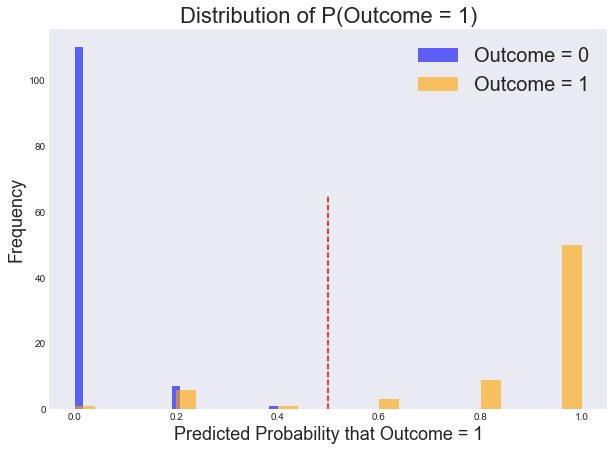

In [72]:
# Create figure.
plt.figure(figsize = (10,7))

# Create two histograms of observations.
plt.hist(pred_df[pred_df['true_values'] == 0]['pred_probs'],
         bins = 25,
         color = 'b',
         alpha = 0.6,
         label = 'Outcome = 0')
plt.hist(pred_df[pred_df['true_values'] == 1]['pred_probs'],
         bins = 25,
         color = 'orange',
         alpha = 0.6,
         label = 'Outcome = 1')

# Add vertical line at P(Outcome = 1) = 0.5.
plt.vlines(x = 0.5,
           ymin = 0,
           ymax = 65,
           color = 'r',
           linestyle = '--')

# Label axes.
plt.title('Distribution of P(Outcome = 1)', fontsize = 22)
plt.ylabel('Frequency', fontsize = 18)
plt.xlabel('Predicted Probability that Outcome = 1', fontsize = 18)

# Create legend.
plt.legend(fontsize = 20);

Where are my true positives, true negatives, false positives, false negatives in this image?</summary>
    
- True Positive:
    - Items I correctly predict to be positive.
    - The orange bars (actual `1`) that are to the right of the red line (predicted `1`).
- True Negative: 
    - Items I correctly predict to be negative.
    - The blue bars (actual `0`) that are to the left of the red line (predicted `0`).
- False Positive:
    - Items I incorrectly predict to be positive.
    - The blue bars (actual `0`) that are to the right of the red line (predicted `1`).
- False Negative: 
    - Items I incorrectly predict to be negative.
    - The orange bars (actual `1`) that are to the left of the red line (predicted `0`).
</details>

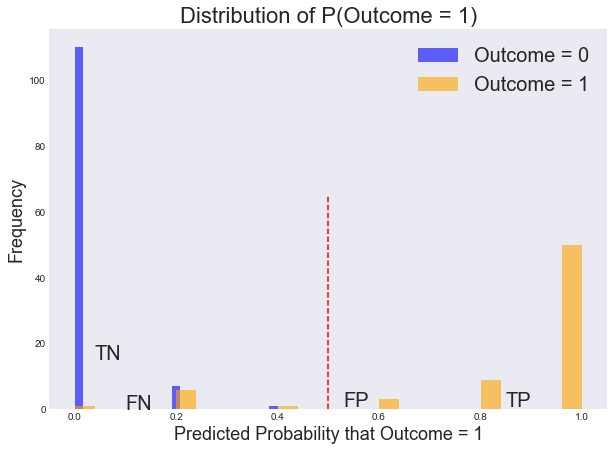

In [73]:
# Create figure.
plt.figure(figsize = (10,7))

# Create two histograms of observations.
plt.hist(pred_df[pred_df['true_values'] == 0]['pred_probs'],
         bins = 25,
         color = 'b',
         alpha = 0.6,
         label = 'Outcome = 0')
plt.hist(pred_df[pred_df['true_values'] == 1]['pred_probs'],
         bins = 25,
         color = 'orange',
         alpha = 0.6,
         label = 'Outcome = 1')

# Add vertical line at P(Outcome = 1) = 0.5.
plt.vlines(x = 0.5,
           ymin = 0,
           ymax = 65,
           color = 'r',
           linestyle = '--')

# Add annotations for TN, FN, TP, FP.
plt.annotate(xy = (0.04, 15),
             s = 'TN',
             size = 20)

plt.annotate(xy = (0.1, 0),
             s = 'FN',
             size = 20)

plt.annotate(xy = (0.85, 1),
             s = 'TP',
             size = 20)

plt.annotate(xy = (0.53, 1),
             s = 'FP',
             size = 20)

# Label axes.
plt.title('Distribution of P(Outcome = 1)', fontsize = 22)
plt.ylabel('Frequency', fontsize = 18)
plt.xlabel('Predicted Probability that Outcome = 1', fontsize = 18)

# Create legend.
plt.legend(fontsize = 20);

Now, let's adjust our classification threshold to be lower. Instead of using 50% as the cutoff between the positive and negative classes, let's move that threshold down to 10%.
- Any observation with a **predicted probability above 10%** would be **predicted to be in the positive class**.
- Any observation with a **predicted probability below 10%** would be **predicted to be in the negative class**.

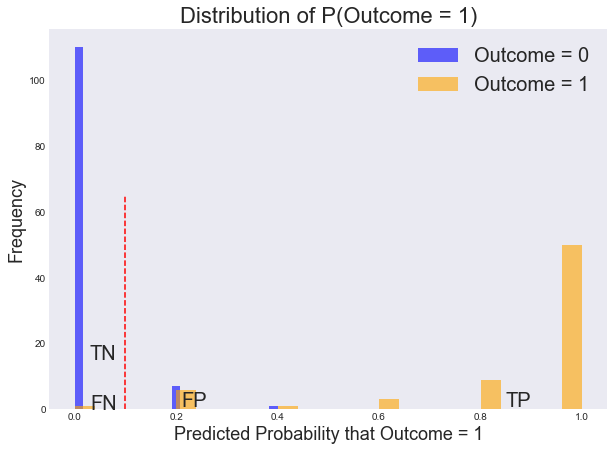

In [74]:
# Create figure.
plt.figure(figsize = (10,7))

# Create two histograms of observations.
plt.hist(pred_df[pred_df['true_values'] == 0]['pred_probs'],
         bins=25,
         color='b',
         alpha = 0.6,
         label='Outcome = 0')
plt.hist(pred_df[pred_df['true_values'] == 1]['pred_probs'],
         bins=25,
         color='orange',
         alpha = 0.6,
         label='Outcome = 1')

# Add vertical line at P(Outcome = 1) = 0.1.
plt.vlines(x=0.1,
           ymin = 0,
           ymax = 65,
           color='r',
           linestyle = '--')

# Add annotations for TN, FN, TP, FP.
plt.annotate(xy = (0.03, 15),
             s = 'TN',
             size = 20)

plt.annotate(xy = (0.03, 0),
             s = 'FN',
             size = 20)

plt.annotate(xy = (0.85, 1),
             s = 'TP',
             size = 20)

plt.annotate(xy = (0.21, 1),
             s = 'FP',
             size = 20)

# Label axes.
plt.title('Distribution of P(Outcome = 1)', fontsize=22)
plt.ylabel('Frequency', fontsize=18)
plt.xlabel('Predicted Probability that Outcome = 1', fontsize=18)

# Create legend.
plt.legend(fontsize=20);

>When I moved my classification threshold to the left, what happened to sensitivity and specificity?

- Our number of true negatives decreased and our number of total negatives remains the same.
    - $\text{Specificity} = \frac{TN}{N} \Rightarrow \text{Specificity decreases.}$
- Our number of true positives increased and our number of total positives remains the same.
    - $\text{Sensitivity} = \frac{TP}{P} \Rightarrow \text{Sensitivity increases.}$
    
    
   Our goal should be to build a model such that there is **no overlap** between the blue histogram and the orange histogram!
- If there is overlap, we need to recognize the tradeoff between sensitivity and specificity. (As one increases, the other decreases.)
- One measure of how much overlap exists between our distributions is the **area under the ROC curve**.



## Receiver Operating Characteristic (ROC) Curve

The Receiver Operating Characteristic curve is a way to visualize the overlap between our positive class and negative class by moving our classification threshold from 0 to 1.
- We start our classification threshold (dashed red line) at 0.
- We calculate sensitivity and 1 - specificity.
- We plot the value of (y = sensitivity, x = 1 - specificity).
- We increase our classification threshold a small number (like 0.005).
- We calculate sensitivity and 1 - specificity.
- We plot the value of (y = sensitivity, x = 1 - specificity).
- We repeat until our threshold is equal to 1.

### Interpreting ROC AUC
- If you have an ROC AUC of 0.5, your positive and negative populations perfectly overlap and your model is as bad as it can get.
- If you have an ROC AUC of 1, your positive and negative populations are perfectly separated and your model is as good as it can get.
- The closer your ROC AUC is to 1, the better. (1 is the maximum score.)
- If you have an ROC AUC of below 0.5, your positive and negative distributions have flipped sides. By flipping your predicted values (i.e. flipping predicted 1s and 0s), your ROC AUC will now be above 0.5.
    - Example: You have an ROC AUC of 0.2. If you change your predicted 1s to 0s and your predicted 0s to 1s, your ROC AUC will now be 0.8!

In [58]:
from sklearn.metrics import roc_auc_score
print(f"ROC AUC score: {roc_auc_score(Y_test, pred_Y)}")

ROC AUC score: 0.9428571428571428


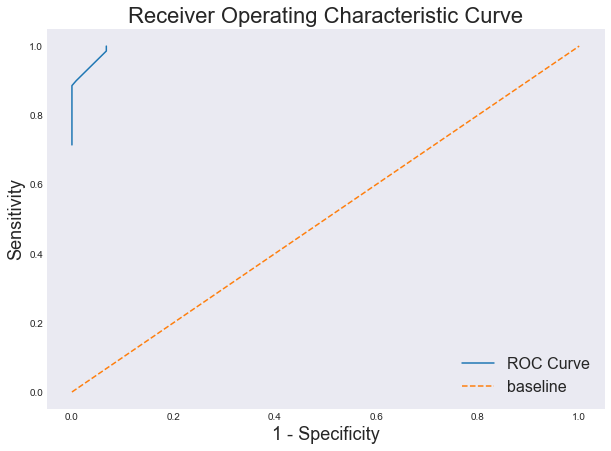

In [76]:
# Create figure.
plt.figure(figsize = (10,7))

# Create threshold values.
thresholds = np.linspace(0, 1, 200)

# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
    

# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
    
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]

# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')

# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')

# Label axes.
plt.title('Receiver Operating Characteristic Curve', fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)

# Create legend.
plt.legend(fontsize=16);

### Balanced / Unbalanced Classes

Suppose I want to predict the incidence of West Nile Virus (WNV) in Chicago.
- 99.9% of my observations are "no WNV."
- 0.1% of my observations contain "WNV."

If we fit a model and tried to optimize for accuracy, I can predict "no WNV" for every location and have an accuracy score that is really, _really_ good!

In classification problems, methods generally perform better when we have roughly equally-sized classes. (i.e. 50% in the positive class and 50% in the negative class for binary classification problems.)

#### Methods for Dealing with Unbalanced Classes

- **Weighting observations.** Some models allow the weighting of classes such as linear and logistic regression, Naive Bayes, Random Forests, SVMs, etc.

<img src="./images/class_weight.png" alt="drawing" width="600"/>

- **Stratified cross-validation.** If we use $k$-fold cross-validation entirely randomly, we may run into issues where some of our folds have no observations from the minority class. It performs stratified sampling to produce folds that contain a representative ratio of each class. At each iteration, the code creates a clone of the classifier, trains the clone on the training folds and makes predictions on the test fold. Then, it counts the number of correct predictions and outputs the ratio of correct predictions. (Refer to pg 89 of Hands on Machine Learning with Sci-kit Learn Book).

<img src="https://snag.gy/PqISr3.jpg" alt="drawing" width="700"/>

By stratifying on our output variable with unbalanced classes during cross-validation, we protect ourselves from this situation and ensure that our estimate of our model performance has lower variance.

- **Changing threshold for classification.**
By adjusting our classification threshold, we might find a better fit for our particular use-case.  We performed this operation earlier by manually changing our predicted labels by choosing a new threshold from the predicted probability.

- **Bias correction.** Gary King wrote a [great whitepaper](https://gking.harvard.edu/files/gking/files/0s.pdf) on this topic.  This is a rigorous approach and while provide good results, as data scientists we often prefer "easier" methods to implement.

- **Purposefully optimizing evaluation metrics.**
We might also consider optimizing our model for a specific metric such as precision, recall by class, ROC AUC.

**Note**
 Since the ROC curve is similar to the precision/recall curve, you may wonder which one to use. As a rule of thumb, you may prefer the PR curve whenever the positive class is rate or when you care more about false positives than false negatives. Otherwise, use ROC curve. 